In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 读取显示图片

In [3]:
img = cv2.imread('/home/kdd/Pictures/1.jpg')

In [4]:
img.shape

(720, 1080, 3)

In [5]:
img.dtype

dtype('uint8')

In [6]:
cv2.imshow('1', img)
cv2.waitKey(10000) # 等待时间
cv2.destroyAllWindows()

In [7]:
def cv_show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0) # 按任意键关闭窗口
    cv2.destroyAllWindows()

In [8]:
# 转灰度图
img1 = cv2.imread('/home/kdd/Pictures/1.jpg', cv2.IMREAD_GRAYSCALE)
img1.shape

(720, 1080)

In [9]:
cv_show('grey1', img1)

In [10]:
type(img1)

numpy.ndarray

In [11]:
img1.size

777600

In [12]:
img.size

2332800

In [13]:
cv_show('bridge', img)

# 图片截取和通道提取、合并

In [14]:
# 截取
brg = img[0:250, 0:540]
cv_show('brg', brg)

In [15]:
# 通道提取
b, g, r = cv2.split(img)

In [16]:
b.shape, g.shape, r.shape

((720, 1080), (720, 1080), (720, 1080))

In [17]:
cv_show('B', b)

In [18]:
cur_img = img.copy()
#cv_show('copy', cur_img)
cur_img[:, :, 0] = 0
cur_img[:, :, 2] = 0
cv_show('G', cur_img)

In [19]:
cur_img1 = img.copy()
#cv_show('copy', cur_img)
cur_img1[:, :, 0] = 0
cur_img1[:, :, 1] = 0
cv_show('R', cur_img1)

In [20]:
cur_img2 = img.copy()
#cv_show('copy', cur_img)
cur_img2[:, :, 1] = 0
cur_img2[:, :, 2] = 0
cv_show('B', cur_img2)

In [21]:
img_merge = cv2.merge((b, g, r))
cv_show('merge', img_merge)

# 读取显示视频

In [22]:
video = cv2.VideoCapture('/home/kdd/Videos/dde-introduction.mp4')

In [23]:
if video.isOpened():
    opened, frame = video.read()
else:
    opened = False

In [24]:
while opened:
    rel, frame = video.read()
    if frame is None:
        break
    if rel == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2BGRA)
        cv2.imshow('res', gray)
        if cv2.waitKey(1) & 0xFF == 27:  # 27表示ESC退出键
            break

video.release()
cv2.destroyAllWindows()

# 图像边界填充

In [25]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [26]:
top_size, bottom_size, left_size, right_size = (50, 50, 50, 50)
# BORDER_REPLICATE: 复制法， 复制最边缘像素
replicate = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REPLICATE)
# BORDER_REFLECT: 反射法， 对感兴趣的图像中的像素在两边进行复制，如: bcda|adcb|bcda
reflect = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REFLECT)
# BORDER_REFLECT_101: 反射法， edcb|abcde|dcba
reflect101 = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_REFLECT_101)
# BORDER_WRAP: 外包装法， abcds|abcds|abcds
wrap = cv2. copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_WRAP)
# BORDER_CONSTANT: 常数值填充
constant = cv2.copyMakeBorder(img, top_size, bottom_size, left_size, right_size, borderType=cv2.BORDER_CONSTANT, value=0)

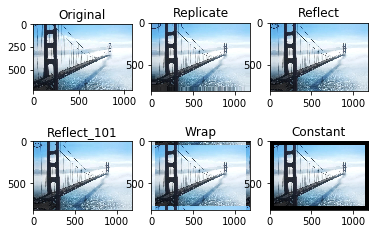

In [27]:
plt.subplot(231), plt.imshow(img, 'gray'), plt.title('Original')
plt.subplot(232), plt.imshow(replicate, 'gray'), plt.title('Replicate')
plt.subplot(233), plt.imshow(reflect, 'gray'), plt.title('Reflect')
plt.subplot(234), plt.imshow(reflect101, 'gray'), plt.title('Reflect_101')
plt.subplot(235), plt.imshow(wrap, 'gray'), plt.title('Wrap')
plt.subplot(236), plt.imshow(constant, 'gray'), plt.title('Constant')
plt.show()

# 数值计算

In [28]:
img2 = cv2.imread('/home/kdd/Pictures/2.jpg')

In [29]:
cv_show('2', img2)

In [30]:
img2[:5, :, 0]

array([[140, 141, 142, ..., 109, 109, 109],
       [140, 141, 142, ..., 109, 109, 109],
       [140, 141, 142, ..., 109, 109, 109],
       [141, 141, 142, ..., 110, 110, 110],
       [142, 142, 141, ..., 110, 110, 110]], dtype=uint8)

In [31]:
img2_10 = img2 + 10
img2_10[:5, :, 0]

array([[150, 151, 152, ..., 119, 119, 119],
       [150, 151, 152, ..., 119, 119, 119],
       [150, 151, 152, ..., 119, 119, 119],
       [151, 151, 152, ..., 120, 120, 120],
       [152, 152, 151, ..., 120, 120, 120]], dtype=uint8)

In [32]:
# %256 取余 
(img2 + img2_10)[:5, :, 0]

array([[ 34,  36,  38, ..., 228, 228, 228],
       [ 34,  36,  38, ..., 228, 228, 228],
       [ 34,  36,  38, ..., 228, 228, 228],
       [ 36,  36,  38, ..., 230, 230, 230],
       [ 38,  38,  36, ..., 230, 230, 230]], dtype=uint8)

In [33]:
# 像素值大于255的取255
cv2.add(img2, img2_10)[:5, :, 0]

array([[255, 255, 255, ..., 228, 228, 228],
       [255, 255, 255, ..., 228, 228, 228],
       [255, 255, 255, ..., 228, 228, 228],
       [255, 255, 255, ..., 230, 230, 230],
       [255, 255, 255, ..., 230, 230, 230]], dtype=uint8)

# 图像融合

In [34]:
cv_show('1', img1)

In [35]:
img + img2

ValueError: operands could not be broadcast together with shapes (720,1080,3) (675,1080,3) 

In [36]:
img_1 = cv2.resize(img, (1080, 675))
img_1.shape

(675, 1080, 3)

In [37]:
img2.shape

(675, 1080, 3)

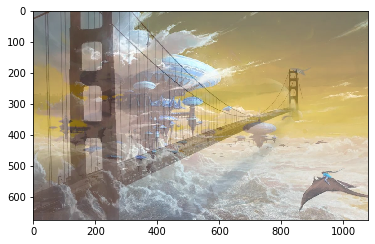

In [38]:
res = cv2.addWeighted(img_1, 0.4, img2, 0.6, 0)
plt.imshow(res)

In [39]:
cv_show('merge', res)

In [40]:
res1 = cv2.resize(img2, (0, 0), fx=0.5, fy=0.5)
cv_show('scale', res1)